9569_024.json   0
9569_024.png


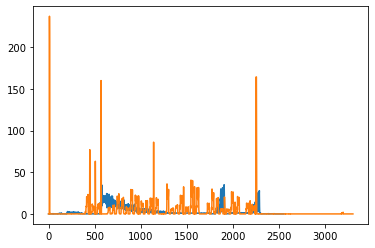

8332_087.json   1
8332_087.png


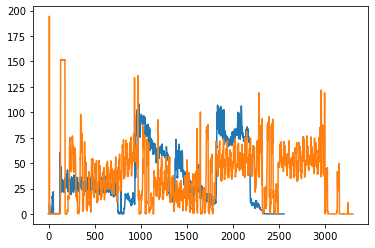

8371_186.json   2
8371_186.png


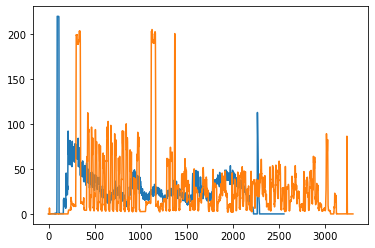

5109_001.json   3
5109_001.png


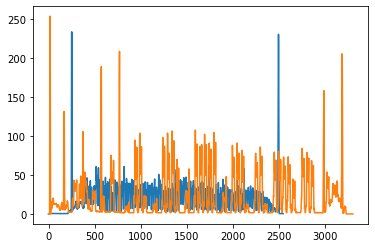

5191_015.json   4
5191_015.png


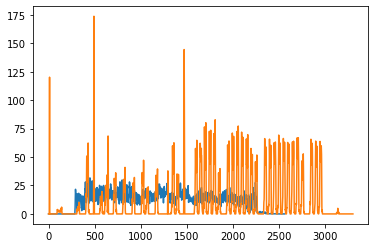

1674_088.json   5
1674_088.png


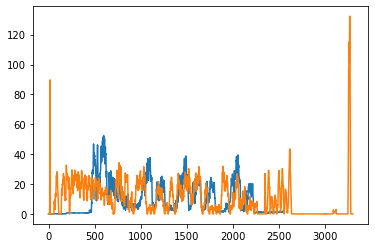

9520_037.json   6
9520_037.png


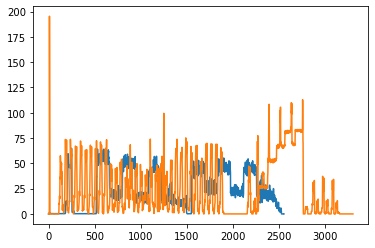

9550_050.json   7
9550_050.png


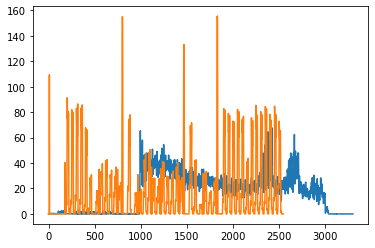

0685_048.json   8
0685_048.png


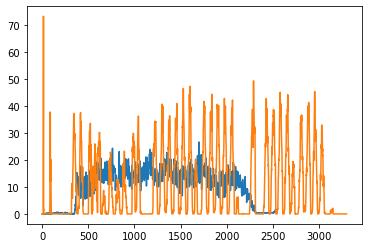

1012_041.json   9
1012_041.png


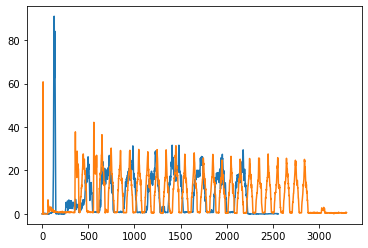

In [1]:
import cv2
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from math import ceil
from PIL import Image

c = 0

DS = r"G:/My Drive/College/Sem-6/BTP/Dataset/UNLV/UNLV_dataset/"
GAN = r"G:/My Drive/College/Sem-6/BTP/Table-Localisation-and-Segmentation-Using-GAN-CNN/"

for file in os.listdir(DS + "unlv_xml_gt"):
	#print("filename : " + file)
	if c==10:
		break

	if file.endswith(".json"):
		
		print(file + "   " + str(c))
		c += 1
		
		with open(DS + "unlv_xml_gt/" + file) as f:
			
			doc_name = file.replace(".json",".png")
			print(doc_name)

			document = cv2.imread(DS + "unlv_images/" + doc_name, 0)
			#cv2.imshow('img', document)
			'''plt.imshow(document)
			plt.show()'''

			# load Image as Grayscale
			i = Image.open(DS + "unlv_images/" + doc_name).convert("L")
			# print(type(i))
			# convert to numpy array
			n = np.array(i)

			# average columns and rows
			# left to right
			cols = np.abs(n.mean(axis=0)-255)
			# bottom to top
			rows = np.abs(n.mean(axis=1)-255)

			plt.plot(cols)
			plt.plot(rows)
			plt.show()

			d_left, d_right, d_top, d_down = 0, 0, 0, 0

			for i in range(0,len(rows)-50):
				if np.count_nonzero(rows[i:i+50]>2) >15:
					d_top = i
					break

			for i in range(len(rows),50,-1):
				if np.count_nonzero(rows[i-50:i]>2) >15:
					d_down = i
					break

			for i in range(0,len(cols)-50):
				if np.count_nonzero(cols[i:i+50]>2) >15:
					d_left = i
					break

			for i in range(len(cols),50,-1):
				if np.count_nonzero(cols[i-50:i]>2) >15:
					d_right = i
					break
			
			rgbimg = cv2.cvtColor(document, cv2.COLOR_GRAY2RGB)  
			rgbimg[d_top:d_down, d_left:d_right] = [255, 0, 1]

			#table boundaries
			boxes = json.load(f)
			for box in boxes:
				t_top = box['top']
				t_down = box['bottom']
				t_left = box['left']
				t_right = box['right']
				rgbimg[t_top:t_down, t_left:t_right] = [8, 0, 255]

			'''plt.imshow(rgbimg)
			plt.show()'''

			'''img = cv2.resize(rgbimg, (512, 512)) 
			plt.imshow(img)
			plt.show()
			cv2.imwrite(GAN + "unlv_local/" + file.replace(".json",".png"), rgbimg)'''
			